In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [13]:
match_data = pd.read_csv('..\\Data\\matchData2.csv')
wins = pd.read_csv('..\\Data\\matchDataWins.csv')

In [14]:
# cantidad de filas de cada conjunto de datos
print(f'Cantidad de filas en match_data: {match_data.shape[0]}')
print(f'Cantidad de filas en wins: {wins.shape[0]}')

Cantidad de filas en match_data: 110714
Cantidad de filas en wins: 110714
Cantidad de filas en timeline_data: 135298


In [15]:
win_team1 = pd.DataFrame(wins['win_team1'])
win_team2 = pd.DataFrame(wins['win_team2'])

<Axes: xlabel='win_team1', ylabel='count'>

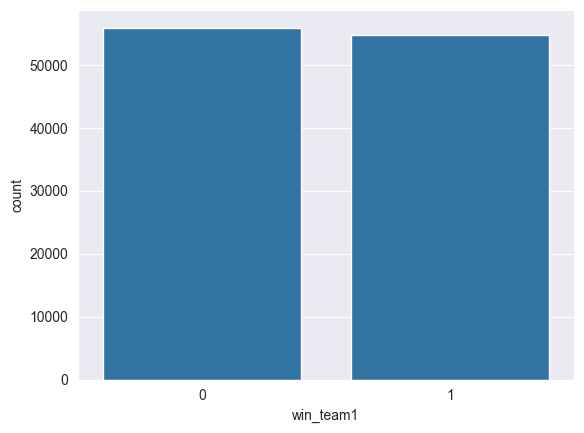

In [4]:
#Graficar la cantidad de victrorias con respecto a las derrotas de un equipo
sns.countplot(x='win_team1', data=wins)

In [17]:
# Elimina las columnas de firstBaron, win_team1 y win_team2
match_data = match_data.drop(['firstBaronTeam1', 'firstBaronTeam2', 'win_team1', 'win_team2'], axis=1)

In [18]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
predictors = match_data
predictors_train, predictors_test, wins_team1_train, wins_team1_test, wins_team2_train, wins_team2_test = train_test_split(predictors, win_team1, win_team2, test_size=0.2, random_state=42)

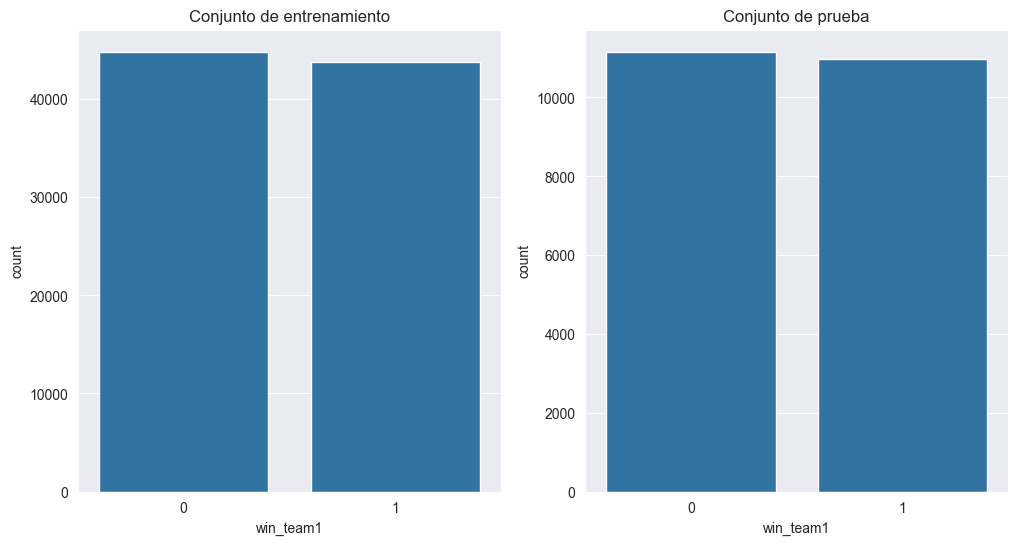

In [11]:
# graficar la cantidad de victorias y derrotas en el conjunto de entrenamiento y prueba
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='win_team1', data=wins_team1_train, ax=ax[0])
ax[0].set_title('Conjunto de entrenamiento')
sns.countplot(x='win_team1', data=wins_team1_test, ax=ax[1])
ax[1].set_title('Conjunto de prueba')
plt.show()

In [19]:
# Inicializa el clasificador
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, min_impurity_decrease=0.0001)

# Entrena el modelo
random_forest_model.fit(predictors_train, wins_team1_train)

D:\Facultad\3_año\Inteligencia_Artificial_1\Proyecto_Final_IA\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(min_impurity_decrease=0.0001, n_jobs=-1, random_state=42)

In [20]:
wins_pred_test = random_forest_model.predict(predictors_test)
wins_pred_train = random_forest_model.predict(predictors_train)


# Evalúa el rendimiento del modelo
accuracy = accuracy_score(wins_team1_test, wins_pred_test)
print(f'Accuracy in test data: {accuracy}')
accuracy = accuracy_score(wins_team1_train, wins_pred_train)
print(f'Accuracy in train data: {accuracy}')

Accuracy in test data: 0.7494919387616854
Accuracy in train data: 0.7522439624707862


Matriz de Confusión:
             Predicted Win  Predicted Lose
Actual Win            8201            2961
Actual Lose           2586            8395


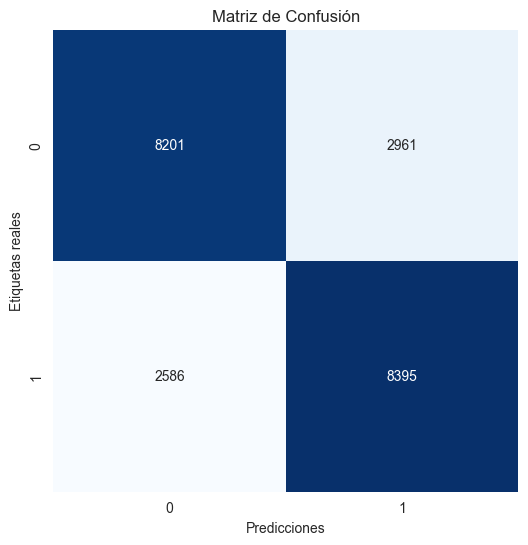

In [21]:
# Crear la matriz de confusión para datos de prueba del team1
conf_matrix = confusion_matrix(wins_team1_test, wins_pred_test)

# Crear un DataFrame de pandas para visualizar mejor la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Win', 'Actual Lose'], columns=['Predicted Win', 'Predicted Lose'])

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix_df)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(wins_pred_test),
            yticklabels=np.unique(wins_team1_test))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

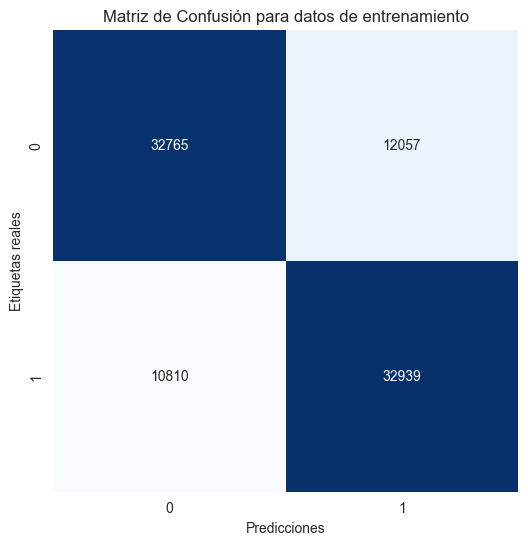

In [17]:
# Crear matriz de confusión para datos de entrenamiento del team1
conf_matrix = confusion_matrix(wins_team1_train, wins_pred_train)

# Crear un DataFrame de pandas para visualizar mejor la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Win', 'Actual Lose'], columns=['Predicted Win', 'Predicted Lose'])

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(wins_pred_train),
            yticklabels=np.unique(wins_team1_train))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión para datos de entrenamiento')
plt.show()

In [18]:
# Calcular la precisión para team1: 
precision = precision_score(wins_team1_test, wins_pred_test, average='weighted')

# Calcular la sensibilidad (recall) para team1: 
recall = recall_score(wins_team1_test, wins_pred_test, average='weighted')

# Calcular la puntuación F1 para team1: 
f1 = f1_score(wins_team1_test, wins_pred_test, average='weighted')

# Calcular la exactitud para team1: 
accuracy = accuracy_score(wins_team1_test, wins_pred_test)

# Imprimir las métricas
print(f'Precisión: {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntuación F1: {f1:.4f}')
print(f'Exactitud: {accuracy:.4f}')

Precisión: 0.7431
Sensibilidad (Recall): 0.7428
Puntuación F1: 0.7428
Exactitud: 0.7428


In [19]:
# Calcular métricas para datos de entrenamiento
precision = precision_score(wins_team1_train, wins_pred_train, average='weighted')
recall = recall_score(wins_team1_train, wins_pred_train, average='weighted')
f1 = f1_score(wins_team1_train, wins_pred_train, average='weighted')
accuracy = accuracy_score(wins_team1_train, wins_pred_train)

# Imprimir las métricas
print(f'Precisión: {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntuación F1: {f1:.4f}')
print(f'Exactitud: {accuracy:.4f}')

Precisión: 0.7421
Sensibilidad (Recall): 0.7418
Puntuación F1: 0.7418
Exactitud: 0.7418


In [22]:
# Ver la importancia de cada columna
feature_importances = random_forest_model.feature_importances_
print('Importancia de las características:')
sorted(feature_importances, reverse=True)
for i, importance in enumerate(feature_importances):
     print(f'{random_forest_model.feature_names_in_[i]}: {importance}')

Importancia de las características:
gameDuration: 0.08455380508167284
firstBloodTeam1: 0.012200123439721428
firstTowerTeam1: 0.26435266912922156
firstDragonTeam1: 0.051336154404295634
firstRiftHeraldTeam1: 0.033391349700348995
ban1Team1: 0.0001492086948310559
ban2Team1: 0.00021822933649948053
ban3Team1: 0.00014161796521814933
ban4Team1: 0.00018216432300520002
ban5Team1: 0.00014521532199795006
champ1Team1: 0.00024239606859009983
champ2Team1: 0.00028874774405242455
champ3Team1: 0.00026413602346846886
champ4Team1: 0.00024769459966036
champ5Team1: 0.00022883669752413882
firstBloodTeam2: 0.006303026118896027
firstTowerTeam2: 0.19347306009744433
firstDragonTeam2: 0.060794092881523966
firstRiftHeraldTeam2: 0.02450792968527484
ban1Team2: 0.00025920165514371605
ban2Team2: 0.00013211843310635373
ban3Team2: 0.0001961056668466089
ban4Team2: 0.00021039377749440565
ban5Team2: 0.00017917279877988283
champ1Team2: 0.00022221299660533624
champ2Team2: 0.00032299416438673757
champ3Team2: 0.000200042117076

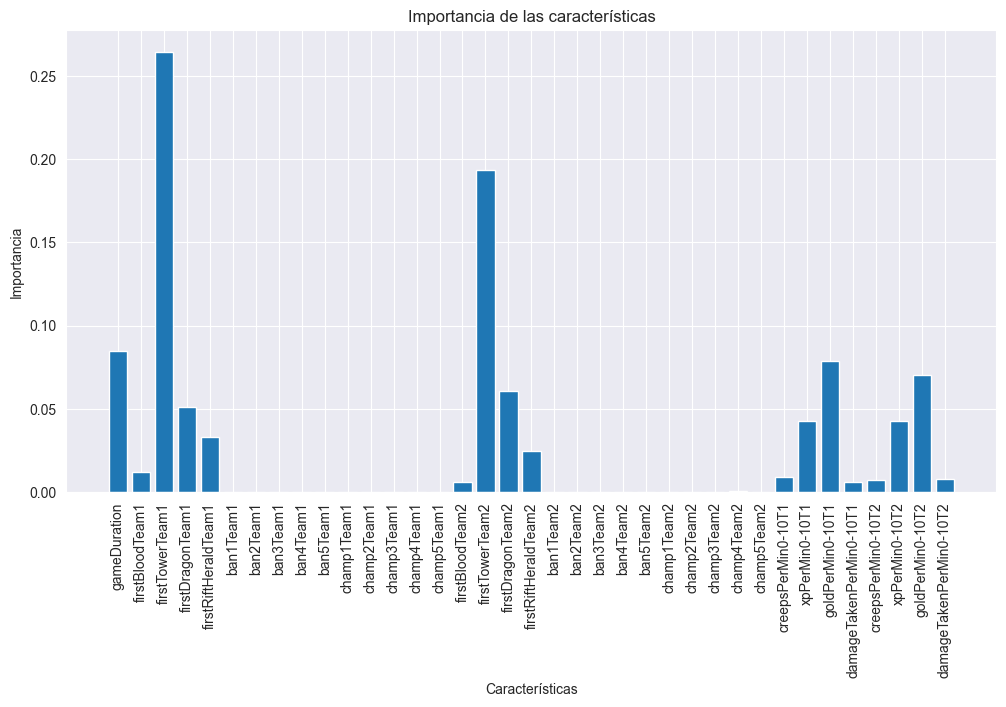

In [23]:
# Creamos un grafico de barras que muestre la importancia de cada caracteristica
plt.figure(figsize=(12, 6))
plt.bar(random_forest_model.feature_names_in_, feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.show()